# MDP: Prediction 

This file contains the code for prediction problem, where the utilities of each state for a given policy are evaluated 

It imports two modules: MDP and Visualization


## MDP.py contains the following:

    - Model for GridMDP  (GridMDP class)

        - Implements the Grid MDP model in AIMA4e Fig. 16.1

    - Functions for

        - Evaluation of utilities of states for a given policy

        - Calculation of Q value of a state-action pair for a given set of utilities
        
        - Extraction of policy for a given set of utilities

## Visualization.py contains the following functions:

    - Function to produce the animation of GridMDP for iterative algorithms with utilities and policies ovelayed on the grid 

    - Function to produce the plot of GridMDP with utilities and policies ovelayed on the grid 
    
    
        


In [1]:
# For Google Colab
# Upload the folder containing this file to google drive.
# Make sure that uninformed_informed_search.py is also in the same folder in google drive.
import sys, os

# Checking if the notebook is opened in google colab
#If YES, mount the google drive and change the directory
if 'google.colab' in sys.modules:
    # mount google drive
    from google.colab import drive
    drive.mount('/content/drive')

    # change path to the folder
    path = '/content/drive/My Drive/IT5005/MDP'
    print(path)
    #os.chdir changes the current working directory
    os.chdir(path)
    !pwd

In [2]:

from MDP import *
from Visualization import *

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import matplotlib as mpl
mpl.rcParams['animation.writer'] = 'ffmpeg'



# Grid MDP modelling

GridMDP implements the system described in Section 16.1 of AIMA4e.

class GridMDP:

 - rows = 3
       
       indicate the number of rows of the grid
       
- columns = 4
       
       indicate the number of columns of the grid

- state is defined as (i,j) where i is the column and j is row, with indexing starts from 1.Index of bottom row is 1 and index of left most column is 1.

       Example:  (2,3) indicates the cell in second row and third column

 - terminal_states={(4, 3): 1, (4, 2): -1} 
    
        (4,3) and (4,2) are terminal states. If the agent enters state (4,3), it collects a reward of 1. If the agent enters state (4,2), it collects a reward of -1. 

 - prob_intended = 0.8
    
        prob_intended is the probability of moving in intended direction

 - prob_perpendicular = 0.8
    
        prob_intended is the probability of moving perpendicular to the intended direction

 - default_reward
        
        indicates the reward for entering non-terminal states

- gamma

       indicates the discount

# Verify transition probabilities and rewards

In [6]:
#Define model with default parameters
mdp = GridMDP()
state = (3,3)   #(4,2)
print(f"Transition Probabilities for the state {state}:")
print(mdp.transition_probabilities[state])
print(f"Rewards for the state {state}:")
print(mdp.rewards[state])
state = (4,3)
print(f"Transition Probabilities for the state {state}:")
print(mdp.transition_probabilities[state])
print(f"Rewards for the state {state}:")
print(mdp.rewards[state])


Transition Probabilities for the state (3, 3):
{'U': [((3, 3), 0.8), ((2, 3), 0.1), ((4, 3), 0.1)], 'D': [((3, 2), 0.8), ((2, 3), 0.1), ((4, 3), 0.1)], 'L': [((2, 3), 0.8), ((3, 3), 0.1), ((3, 2), 0.1)], 'R': [((4, 3), 0.8), ((3, 3), 0.1), ((3, 2), 0.1)]}
Rewards for the state (3, 3):
{'U': {(3, 3): -0.04, (2, 3): -0.04, (4, 3): 1}, 'D': {(3, 2): -0.04, (2, 3): -0.04, (4, 3): 1}, 'L': {(2, 3): -0.04, (3, 3): -0.04, (3, 2): -0.04}, 'R': {(4, 3): 1, (3, 3): -0.04, (3, 2): -0.04}}
Transition Probabilities for the state (4, 3):
{'U': [((4, 3), 1.0)], 'D': [((4, 3), 1.0)], 'L': [((4, 3), 1.0)], 'R': [((4, 3), 1.0)]}
Rewards for the state (4, 3):
{'U': {(4, 3): 0}, 'D': {(4, 3): 0}, 'L': {(4, 3): 0}, 'R': {(4, 3): 0}}


# Prediction 

This function evaluates the utilities of states $U^{\pi}(s)\; \forall s$, given the policy $\pi$

It uses iterative method to solve the following system of linear equations

$$U^{\pi}(s) = \sum_{s'} P(s'|\pi(s),s') [R(s, \pi(s), s')+ \gamma U^{\pi}(s)]$$

where $P(s'|\pi(s),s')$, $R(s, \pi(s), s')$ and $\gamma$ are constants for a given MDP and policy.

# Evaluation of a random policy

{(1, 1): -0.47419539289202073, (2, 1): -0.5195622070554693, (3, 1): -0.5372091288285452, (4, 1): -0.7149455446828569, (1, 2): -0.20176230653079455, (3, 2): -0.839728933227307, (4, 2): 0, (1, 3): -0.17431122955181277, (2, 3): -0.13961248753072164, (3, 3): 0.18381044754448062, (4, 3): 0}


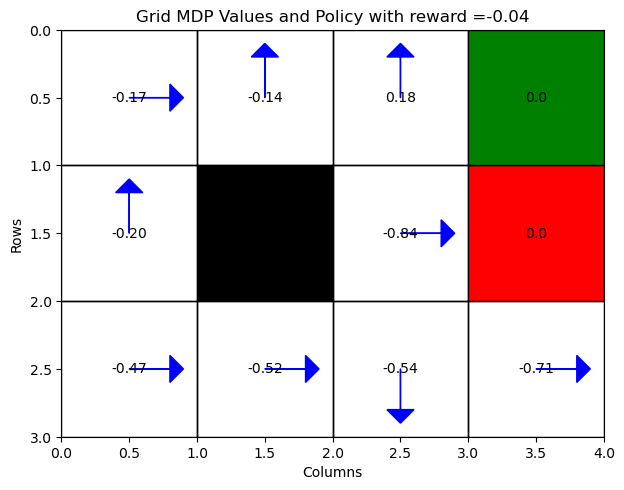

In [7]:
mdp = GridMDP()
random_policy = {state: np.random.choice(mdp.actions) for state in mdp.states if state not in mdp.terminal_states}
U_random_policy = policy_evaluation(mdp, random_policy, theta=0.001)
print(U_random_policy)
plot_policy_with_utilities(mdp, U_random_policy, random_policy)

# Deterministic MDP 

Each action costs 1 unit, i.e., reward = -1

Only one terminal state with reward of -1 for transition to terminal state

All actions are deterministic

 - prob_intended=1

 - prob_perpendicular=0

Discount factor of 1

 - gamma = 1
 
 



{(1, 1): -5, (2, 1): -4, (3, 1): -3, (4, 1): -2, (1, 2): -4, (3, 2): -2, (4, 2): -1, (1, 3): -3, (2, 3): -2, (3, 3): -1, (4, 3): 0}


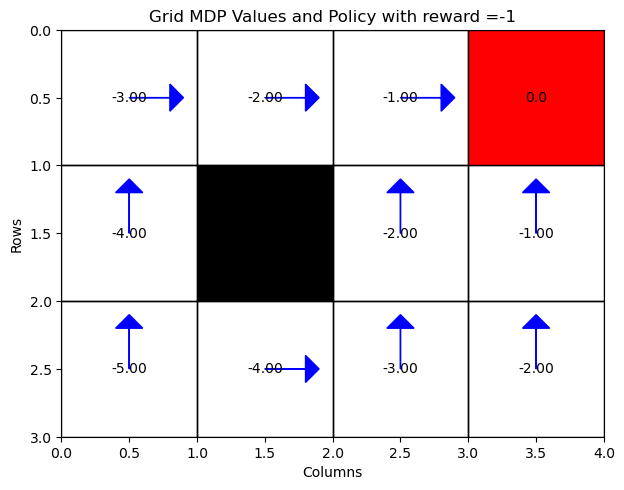

In [5]:

deterministic_mdp = GridMDP(default_reward=-1, terminal_states={(4, 3): -1},prob_intended=1, prob_perpendicular=0, gamma = 1)
policy = {(1,1): 'U', (1,2): 'U', (1,3): 'R', (2,1): 'R', (2,3): 'R', (3,1): 'U', (3,2): 'U', (3,3): 'R', (4,1): 'U',(4,2): 'U'}
U_policy = policy_evaluation(deterministic_mdp, policy)
print(U_policy)
plot_policy_with_utilities(deterministic_mdp, U_policy, policy)